# Kaggle - TMDB 

### Extract tables - production_companies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import math

In [2]:
MILLION = 1000000

In [3]:
train = pd.read_csv('train.csv')

### production_companies

In [10]:
train['production_companies'].fillna('[]').map(lambda x: len(ast.literal_eval(x))).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [18]:
train['production_companies'].fillna('[{"id":-123}]').map(lambda x: [i['id'] for i in (ast.literal_eval(x))]).head()

0          [4, 60, 8411]
1                    [2]
2    [2266, 3172, 32157]
3                 [-123]
4                 [-123]
Name: production_companies, dtype: object

In [62]:
productions = []
for p in train[train['production_companies'].notnull()]['production_companies'].map(lambda x: [(i['id'],i['name']) for i in (ast.literal_eval(x))]).values:
    productions.extend(p)

prod_id = [p[0] for p in productions]
prod_name = [p[1] for p in productions]

productions,counts = np.unique(np.array(prod_id),return_counts=True)

prod_names = {}
for i in range(len(prod_id)):
    prod_names[prod_id[i]] = prod_name[i]

In [70]:
[prod_names[p] for p in productions[counts>50]]

['Walt Disney Pictures',
 'Paramount Pictures',
 'Columbia Pictures',
 'New Line Cinema',
 'Universal Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures Corporation',
 'TriStar Pictures',
 'Warner Bros.',
 'Metro-Goldwyn-Mayer (MGM)',
 'Touchstone Pictures']

Start with highest

In [82]:
i = 2
train[train['production_companies'].fillna('[{"id":-123}]').map(lambda x: True if i in [i['id'] for i in (ast.literal_eval(x))] else False)]['revenue'].map(math.log).mean()

18.857807128309688

In [83]:
prod_ave_of_log = {}
for i in prod_names.keys():
    prod_ave_of_log[i] = train[train['production_companies'].fillna('[{"id":-123}]').map(
        lambda x: True if i in [i['id'] for i in (ast.literal_eval(x))] else False)]['revenue'].map(
        math.log).mean()  

In [84]:
prod_ave_of_log

{4: 17.381079061980937,
 60: 17.000036930747143,
 8411: 16.413752160032484,
 2: 18.857807128309688,
 2266: 15.82955131214877,
 3172: 18.064468560641856,
 32157: 16.291829638699493,
 768: 18.204739504745852,
 22637: 18.263396033176583,
 2504: 17.35145416487623,
 6254: 17.35145416487623,
 97: 17.37482457838468,
 306: 17.662572621798066,
 5263: 16.935318604087552,
 5264: 16.36536570315134,
 10201: 17.31646346120715,
 27: 18.480664455113253,
 2721: 19.691274090816837,
 215: 16.890685472749276,
 216: 17.58664945475536,
 1693: 18.33539364210796,
 44: 17.421335357127607,
 56: 18.579960510083907,
 766: 19.69708469491702,
 26265: 19.69708469491702,
 76068: 19.69708469491702,
 51316: 5.288267030694535,
 1600: 17.76343751952742,
 6363: 16.840137128242116,
 288: 15.45742696753967,
 13151: 14.025977296950373,
 18188: 14.025977296950373,
 26783: 14.025977296950373,
 2452: 16.689118611850255,
 6901: 13.18905016463245,
 7309: 12.800982127920125,
 29305: 14.374816012036838,
 972: 17.946475834915475,
 3

In [87]:
paol = pd.Series(prod_ave_of_log)

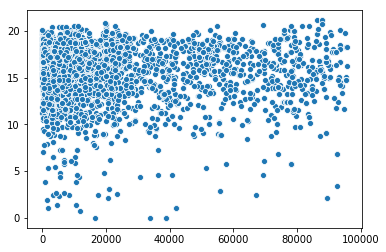

In [89]:
sns.scatterplot(x=paol.index,y=paol.values)

In [95]:
paol = paol.to_frame()

In [99]:
paol.columns = ['revenue']
paol.head()

,revenue
4,17.381079
60,17.000037
8411,16.413752
2,18.857807
2266,15.829551


In [108]:
paol['counts'] = paol.index.map(dict(zip(productions,counts)))
paol.head()

,revenue,counts
4,17.381079,161
60,17.000037,44
8411,16.413752,84
2,18.857807,62
2266,15.829551,4


In [111]:
train

array([84])

In [112]:
train[train['production_companies'].fillna('[{"id":-123}]').map(
        lambda x: True if 2266 in [i['id'] for i in (ast.literal_eval(x))] else False)]['revenue']

2       13092000
1647    78054825
2580       45431
2636    67918658
Name: revenue, dtype: int64

In [114]:
np.log([13092000,78054825,45431,67918658]).mean()

15.82955131214877

In [116]:
paol['name'] = paol.index.map(prod_names)
paol.head()                  

,revenue,counts,name
4,17.381079,161,Paramount Pictures
60,17.000037,44,United Artists
8411,16.413752,84,Metro-Goldwyn-Mayer (MGM)
2,18.857807,62,Walt Disney Pictures
2266,15.829551,4,Bold Films


In [119]:
train.head()['production_companies'][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [120]:
paol.to_csv('production_companies.csv')